In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io

%matplotlib inline

In [2]:
face = io.imread('../data/man.png', as_gray=True)

In [3]:
face.shape

(360, 480)

In [4]:
V, D, U = np.linalg.svd(face, full_matrices=False)

In [5]:
V.shape, D.shape, U.shape

((360, 360), (360,), (360, 480))

In [6]:
V @ np.diag(D) @ U 

array([[0.49057608, 0.49057608, 0.49057608, ..., 0.81330118, 0.81330118,
        0.81330118],
       [0.49057608, 0.49057608, 0.49057608, ..., 0.81330118, 0.81330118,
        0.81330118],
       [0.49057608, 0.49057608, 0.49057608, ..., 0.81330118, 0.81330118,
        0.81330118],
       ...,
       [0.35118627, 0.35118627, 0.35510784, ..., 0.08085098, 0.08560588,
        0.09344902],
       [0.35118627, 0.35118627, 0.35118627, ..., 0.12398824, 0.11305686,
        0.11305686],
       [0.35118627, 0.35118627, 0.35118627, ..., 0.1788902 , 0.13658627,
        0.11305686]])

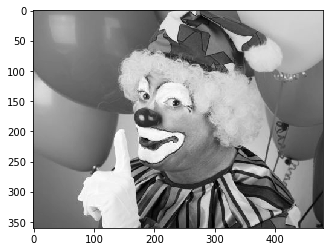

In [7]:
plt.imshow(face, cmap=plt.cm.gray)

In [8]:
k = 40

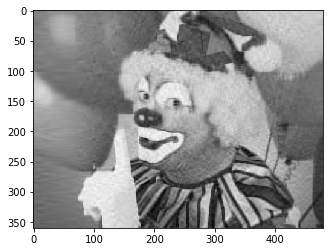

In [9]:
plt.imshow(V[:,:k] @ np.diag(D[:k]) @ U[:k, :], cmap=plt.cm.gray)

In [10]:
import sklearn.neighbors
from sklearn.decomposition import PCA

In [11]:
faces = np.load('../data/faces.npy')

In [12]:
faces.shape

(8832, 400)

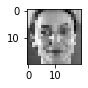

In [13]:
plt.figure(figsize=(2, 1))
plt.imshow(faces[9].reshape((20, 20)), cmap=plt.cm.gray)

In [14]:
pca = PCA(n_components=40)

In [15]:
pca.fit(faces)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
new_faces = pca.transform(faces)

In [17]:
new_faces.shape

(8832, 40)

In [18]:
kde = sklearn.neighbors.KernelDensity()

In [19]:
kde.fit(new_faces)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [20]:
kde.sample()

array([[-637.65689738,  300.25954501, -104.05742366, -196.77168416,
         114.07579673,   79.5579923 ,  101.10203924, -200.45216467,
         167.61271688, -101.00127546,  -21.07974743,  282.55202965,
        -242.44433387, -226.70535441, -136.69513357,  -84.75251493,
          69.51116605,  -28.3126498 ,  -12.07478546,   81.84144118,
         -10.29949699,   84.21806154, -108.16675526,   78.25994859,
          49.73625225,   18.76148138,  -29.83347895,   11.03017841,
           7.96805687,   21.50057944,   16.92874949,   34.29586733,
         -61.66932128,   -7.1607871 ,  -69.47965801, -125.88539016,
           6.81537324,   23.6964502 ,   -8.55448335,   54.39483171]])

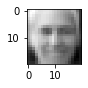

In [24]:
plt.figure(figsize=(2, 1))
s = kde.sample()
new_face = pca.inverse_transform(s)
plt.imshow(new_face.reshape((20, 20)), cmap=plt.cm.gray)